# This notebook demonstrates a typical pipeline of running MAMP experiments

## Import

In [ ]:
import numpy as np
import sys
sys.path.append('../')
from testSim import test
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline

## Simulate

In [2]:
env = 'parking'
time_pos = test(env, "../problems/{}/problem.yaml".format(env), "../problems/{}/config.yaml".format(env))


----- 0 -----
- Find Collision and Reroute
Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-18
Printing Solution with Solving Time  0.0033261369972024113 s
[0] [0.0, 35.0, 55.0]
[1] [12.5, 22.5, 52.5]
[2] [21.16025403784434, 22.5, 42.5]
[3] [42.16025403784434, 43.5, 42.5]
[4] [56.01666049839534, 43.5, 26.5]
[5] [94.01666049839534, 5.5, 21.5]
[6] [107.87306695894634, 5.5, 5.5]
[7] [147.37306695894634, 45.0, 5.0]
- Feasible Plan Found with Makespan 147.37306695894634
- Find Collision and Reroute
Printing Solution with Solving Time  0.003242569997382816 s
[0] [0.0, 50.0, 55.0]
[1] [27.5, 22.5, 52.5]
[2] [36.16025403784435, 22.5, 42.5]
[3] [57.16025403784435, 43.5, 42.5]
[4] [71.01666049839534, 43.5, 26.5]
[5] [109.01666049839534, 5.5, 21.5]
[6] [122.87306695894635, 5.5, 5.5]
[7] [147.37306695894637, 30.0, 5.0]
- Feasible Plan Found with Makespan 147.37306695894637
- Find Collision and Reroute
Printing Solution with Solving Time  0.003484371998638380

In [3]:
# times = []
# pos = []
# for agent in range(len(time_pos)):
#     times.append(np.array(time_pos[agent])[:,0])
#     pos.append(np.array(time_pos[agent])[:,1:])             

### The results of one experiment is saved in the results/ folder and include the following contents. 
* The environment(yaml)
* The configuration(yaml)
* The planned time-positions(data)
* The actual trajectory(not saved as for now)
* The figure(svg)
* The animation(mp4)

## Save Planning data

In [3]:
import yaml
import os
from problems.util import read_problem,read_configuration

In [4]:
# Save a copy of env and config data
expr_name = '{}_0'.format(env)

for file_prefix in ['problem','config']:
    with open("../problems/{}/{}.yaml".format(env,file_prefix)) as f:
        data = yaml.safe_load(f)

    filename = "../results/{}/{}.yaml".format(expr_name,file_prefix)
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        yaml.dump(data,f)

# Save the planned time-positions
filename = "../results/{}/ref.yaml".format(expr_name)
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, "w") as f:
    yaml.dump(time_pos,f)

## Generate Visualization Results

In [5]:
from algs.ref2traj import ref2traj
from viz.plot import plot_results

/home/tianpeng/Desktop/s2m2/notebooks/../viz/plot.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


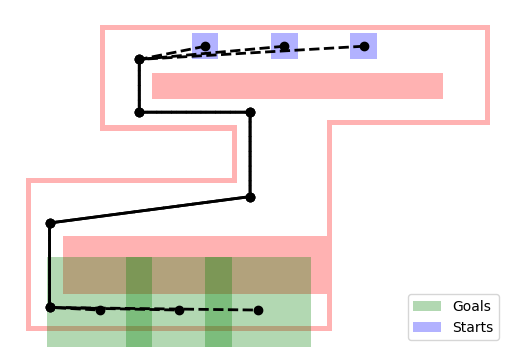

In [6]:
# Load environment and configuration 
name, limits, Obstacles, agents, Thetas, Goals = read_problem("../results/{}/problem.yaml".format(expr_name))
min_segs, max_segs, obs_steps = read_configuration("../results/{}/config.yaml".format(expr_name))

# Plot planning result

file_prefix = expr_name 
filename= "../results/{}/{}.svg".format(expr_name,file_prefix)

trajs = ref2traj(time_pos)

plot_results(agents, limits, Obstacles, Thetas, Goals, trajs, name, refs=time_pos,save_to_path = filename)

In [31]:
from viz.animate_2 import animate_results
from IPython import display

In [32]:
from viz.util import extract_paths
paths = extract_paths(agents, Thetas, trajs)

In [55]:
# Animate the results
file_prefix = expr_name 
filename= "../results/{}/{}.mp4".format(expr_name,file_prefix)
ani = animate_results(agents,limits, Obstacles, Thetas, Goals, paths,save_to_path=filename)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
# Avoid plotting an extra figure.
plt.close()